# Rescale, resize, and downscale

`Rescale` operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis.

`Resize` serves the same purpose, but allows to specify an output image shape instead of a scaling factor.

`Downscale` serves the purpose of down-sampling an n-dimensional image by
integer factors using the local mean on the elements of each block of the size
factors given as a parameter to the function.

In [1]:
import hylite
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from hylite import io

In [3]:
from skimage.transform import rescale, resize, downscale_local_mean, resize_local_mean

In [4]:
#we add the path of our datasets
HyMap=io.load('/Users/rachdi18/Documents/Namibia_Epembe/HyMap_Epembe/Level 1/HyMap_Epembe_Mosaick_masked_v4_cut.hdr')
EMIT=io.load('/Users/rachdi18/Documents/Namibia_Epembe/EMIT/emitSubsetbsq.hdr')

In [5]:
# Create a copy of the image
image = HyMap.copy()

In [6]:
#downscale_local_mean arguments
downscale_local_mean?

Signature: downscale_local_mean(image, factors, cval=0, clip=True)
Docstring:
Down-sample N-dimensional image by local averaging.

The image is padded with `cval` if it is not perfectly divisible by the
integer factors.

In contrast to interpolation in `skimage.transform.resize` and
`skimage.transform.rescale` this function calculates the local mean of
elements in each block of size `factors` in the input image.

Parameters
----------
image : ndarray
    N-dimensional input image.
factors : array_like
    Array containing down-sampling integer factor along each axis.
cval : float, optional
    Constant padding value if image is not perfectly divisible by the
    integer factors.
clip : bool, optional
    Unused, but kept here for API consistency with the other transforms
    in this module. (The local mean will never fall outside the range
    of values in the input image, assuming the provided `cval` also
    falls within that range.)

Returns
-------
image : ndarray
    Down-sampled 

In [7]:
# create a copy of an image without copying the image data
image_resized = image.copy(data=False)
# downscale the image data 
image_resized.data = downscale_local_mean(image.data, (6, 6, 1) )
#rescale the data again in order to preserve the same spatial dimension of the image
image_resized.data = rescale(image_resized.data, (6, 6, 1), order=0 )

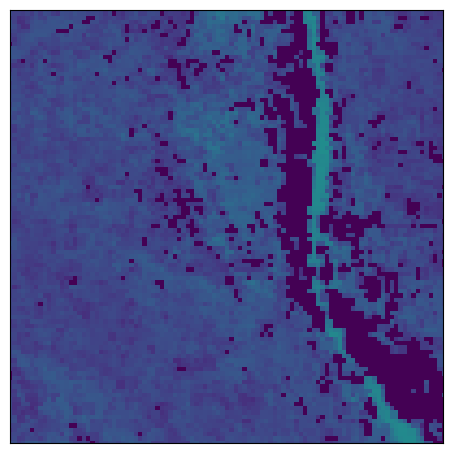

In [8]:
#cheaking if our image was succesfully resized by visualising the same pixel from both scenes
fig,ax = image.quick_plot()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
fig.show()

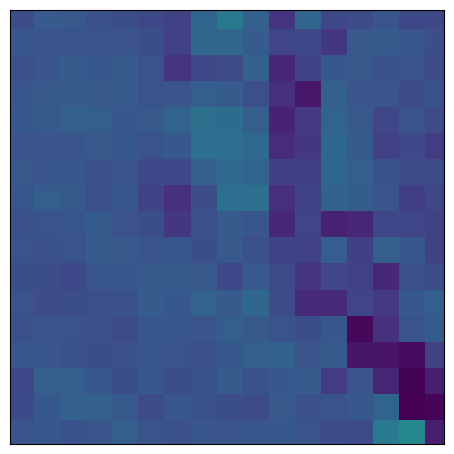

In [9]:
fig,ax = image_resized.quick_plot()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
fig.show()

In [10]:
io.save('/Users/rachdi18/Documents/Namibia_Epembe/resampling/image_resized.hdr', image_resized)

In [11]:
#Upsampling EMIT

In [12]:
image1 = EMIT.copy()

In [13]:
# create a copy of an image without copying the image data
Emit_resized = image1.copy(data=False)
#resizing the image by a given scaling factor and the order of the interpolation
Emit_resized.data = rescale(image1.data, (2, 2, 1), order=0 )
# update georeferencing information to accomodate image resizing
a = image1.affine
Emit_resized.affine = (a[0],a[1]/2,a[2],a[3],a[4],a[5]/2)
Emit_resized.header['spatialresolution'] = float(image1.header['spatialresolution']) / 2

In [14]:
a = image1.affine
Emit_resized.affine = (a[0],a[1]/2,a[2],a[3],a[4],a[5]/2)

In [15]:
io.save('/Users/rachdi18/Documents/Namibia_Epembe/resampling/emit_resized.hdr', Emit_resized)